<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_RNN_GRU_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 63kB/s 
     |████████████████████████████████| 501kB 49.7MB/s 
     |████████████████████████████████| 3.1MB 38.1MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, GaussianNoise, BatchNormalization, MaxPooling2D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [5]:

tf.__version__

'2.0.0-beta1'

## **Simple RNN**

### Synthetic Data

> Two ways of creating synthetic Sine wave data.

In [0]:
series = np.linspace(1, 30)

def f(x):
    return np.sin(x) + np.random.normal (scale=0.5, size=len(x))

series = f(series)

In [0]:
series = np.sin (0.1*np.arange(500)) + np.random.randn(500)*0.1

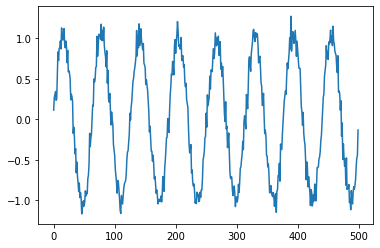

In [8]:
plt.plot(series)
plt.show()

In [0]:
# previous timesteps = T
T = 10
X = []
y = []

for t in range (len (series) - T) :
  y.append (series[t + T])
  X.append (series[t:t+T])

In [10]:
X = np.asarray (X).reshape (-1, T, 1)
y = np.asarray (y)
N = len (X)

cot = np.int (np.floor (N * (3/4)))
cot

367

In [0]:
X_train = X[:cot]
X_test = X[cot:]
y_train = y[:cot]
y_test = y[cot:]

In [12]:
X.shape, y.shape

((490, 10, 1), (490,))

### Model Building

In [0]:
i = Input (shape=(T,1))

x = SimpleRNN (10, activation='relu') (i)
x = Dense (1)(x)

In [0]:
model = Model (i, x)

In [0]:
adam = tf.keras.optimizers.Adam (learning_rate=0.05, decay=5e-5)

In [0]:
model.compile (optimizer=adam,
                    loss='mse')

In [0]:
epochs = 100

In [0]:
r = model.fit (X_train, y_train, epochs=epochs, verbose=False, validation_data=(X_test, y_test))

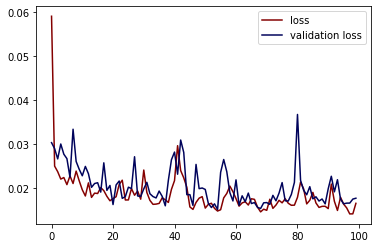

In [19]:
plt.plot (r.history['loss'], label='loss', color='#840000')
plt.plot (r.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

### Forecasting

In [0]:
array = X_test[-1:]
y_hats = []
for c in range (50):
  y_hat = model.predict(array)[0,0]
  y_hats.append (y_hat)
  sliced = array.reshape (-1,10).tolist()[0][1:]
  sliced.append (y_hat)
  array = np.asarray (sliced).reshape (-1,10).transpose().reshape(-1,10,1)

In [0]:
# y_hats

In [0]:
forecast = model.predict(X_test).reshape(1,-1).tolist()[0]
forecast = forecast + y_hats

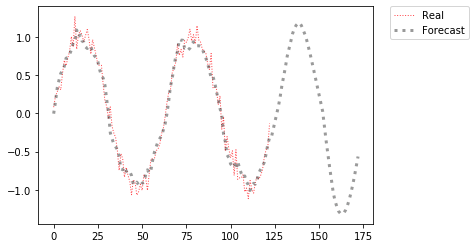

In [23]:
plt.plot(y_test, color='#ff474c', label='Real', linewidth=1, linestyle=':')
plt.plot(forecast, color='#363737', label='Forecast', linewidth=3, linestyle=':', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Observations

1.   After several iterations of forecast, prediction collapses to a single repeating value.
2.   Simple ARIMA is better for modeling Sine plus dither synthetic data.



## **Simple GRU**

In [0]:
from tensorflow.keras.layers import GRU, LSTM

In [0]:
series = np.sin (0.5*np.arange(500)**2)

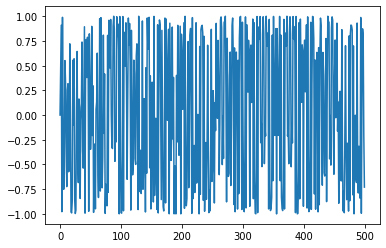

In [36]:
plt.plot(series)
plt.show()

In [0]:
# previous timesteps = T
T = 10
X = []
y = []

for t in range (len (series) - T) :
  y.append (series[t + T])
  X.append (series[t:t+T])

X = np.asarray (X).reshape (-1, T, 1)
y = np.asarray (y)
N = len (X)

cot = np.int (np.floor (N * (3/4)))

X_train = X[:cot]
X_test = X[cot:]
y_train = y[:cot]
y_test = y[cot:]

In [38]:
X.shape, y.shape

((490, 10, 1), (490,))

In [0]:
i = Input (shape=(T,1))

x = LSTM (10) (i)
x = Dense (1)(x)

In [0]:
model = Model (i, x)

In [0]:
adam = tf.keras.optimizers.Adam (learning_rate=0.05, decay=5e-5)

In [0]:
model.compile (optimizer=adam,
                    loss='mse')

In [0]:
epochs = 100

In [0]:
s = model.fit (X_train, y_train, epochs=epochs, verbose=False, validation_data=(X_test, y_test))

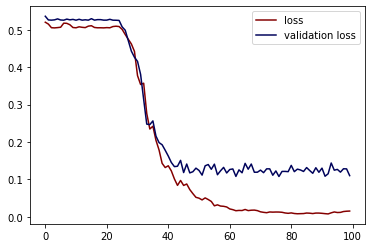

In [55]:
plt.plot (s.history['loss'], label='loss', color='#840000')
plt.plot (s.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

In [0]:
array = X_test[-1:]
y_hats = []
for c in range (50):
  y_hat = model.predict(array)[0,0]
  y_hats.append (y_hat)
  sliced = array.reshape (-1,10).tolist()[0][1:]
  sliced.append (y_hat)
  array = np.asarray (sliced).reshape (-1,10).transpose().reshape(-1,10,1)

In [0]:
forecast = model.predict(X_test).reshape(1,-1).tolist()[0]
forecast = forecast + y_hats

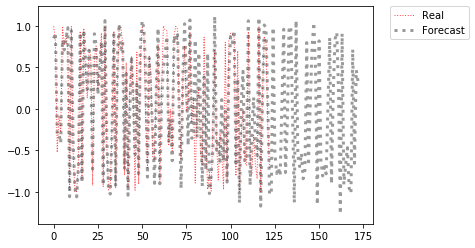

In [58]:
plt.plot(y_test, color='#ff474c', label='Real', linewidth=1, linestyle=':')
plt.plot(forecast, color='#363737', label='Forecast', linewidth=3, linestyle=':', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Observation

1.   LSTM performed remarkably well given the sporadic up/down data.
2.   Keeping the activation layer as TANH vs RELU, performed significantly better in both forecast and loss convergence.
3. Try GlobalMaxPooling1D



In [59]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.evaluate(X_test, y_test)

123/123 [==============================] - 0s 211us/sample - loss: 0.1099


0.1098638764484142